In [1]:
import os
SEED = 123
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.externals import joblib
import qgrid
def gview(data):
    return(qgrid.show_grid(data,show_toolbar=True,grid_options={'forceFitColumns': False,'highlightSelectedCell': True,'highlightSelectedRow': True}))
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

random.seed(123)
# -----------FUNCTIONS ------------
%run global_functions.py
%run viz_functions.py
%run dataprep_functions.py
%run Retention_func.py

curr_dir = os.getcwd()
print("current directory:\n\t\t",curr_dir)

os.chdir(curr_dir)

folder_list=['input_data','temp_data','submission']

for iin in folder_list:
    if not os.path.exists(f'{iin}'):
        os.makedirs(f'{iin}')   
    
#data_locn = '/home/jovyan/jupyter/notebooks/AIG_Retention/input_data'

from datetime import datetime
t_stamp = datetime.now().strftime("%d-%m-%Y_%I-%M-%S_%p")

# if False:
#     test_output.to_csv(f'output_data/output_june_decile_{t_stamp}.csv',index=False)

current directory:
		 D:\data\Nabi_Av\janatahack_bank


In [4]:
filename = os.listdir('input_data/')
filename

['sample_submission_HSqiq1Q.csv', 'test_fjtUOL8.csv', 'train_fNxu4vz.csv']

In [5]:
test_df  =  pd.read_csv(f'input_data/{filename[1]}',encoding = 'latin');print('****TEST****',test_df.shape)
train_df  =  pd.read_csv(f'input_data/{filename[2]}',encoding = 'latin');print('****TRAIN****',test_df.shape)
train_df  = data_basic_clean(train_df)
test_df  = data_basic_clean(test_df)

****TEST**** (109541, 13)
****TRAIN**** (109541, 13)


In [6]:
sample_df  =  pd.read_csv(f'input_data/{filename[0]}',encoding = 'latin');print('****sample****',sample_df.shape)
sample_df.columns = map(str.lower,sample_df.columns)

****sample**** (109541, 2)


In [7]:
re = summarise_yourdf(train_df,10)
gview(re)

Dataset Shape: (164309, 14)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [8]:
miss_num = ['months_since_deliquency','annual_income']
miss_cat = ['home_owner','length_employed']

In [9]:

tempi = train_df[miss_num].fillna(train_df[miss_num].mean())
train_df.drop(columns=miss_num,inplace=True)

train_df= pd.concat([train_df,tempi],axis=1)

train_df['home_owner'] = train_df['home_owner'].fillna(train_df['home_owner'].mode()[0])
train_df['length_employed'] = train_df['length_employed'].fillna(train_df['length_employed'].mode()[0])

In [10]:

tempi = test_df[miss_num].fillna(test_df[miss_num].mean())
test_df.drop(columns=miss_num,inplace=True)

test_df= pd.concat([test_df,tempi],axis=1)

test_df['home_owner'] = test_df['home_owner'].fillna(test_df['home_owner'].mode()[0])
test_df['length_employed'] = test_df['length_employed'].fillna(test_df['length_employed'].mode()[0])

In [11]:
id_name = 'loan_id'
y_name = 'interest_rate'
x_name = [coli for coli in train_df.columns if coli not in [f'{y_name}',f'{id_name}']]

In [12]:
x =  train_df[x_name]
y =  train_df[y_name]
x_te = test_df[x_name]

In [13]:
x_name

['loan_amount_requested',
 'length_employed',
 'home_owner',
 'income_verified',
 'purpose_of_loan',
 'debt_to_income',
 'inquiries_last_6mo',
 'number_open_accounts',
 'total_accounts',
 'gender',
 'months_since_deliquency',
 'annual_income']

In [14]:
x_tr , x_val , y_tr , y_val = train_test_split(x , y , 
                                               test_size = 0.05,stratify = y,
                                               random_state =  SEED )

In [15]:

print('Dimension :  \n\t\tTrain Dataset : {} \tvalidation Dataset : {}'.format(len(x_tr),len(x_val)))

Dimension :  
		Train Dataset : 156093 	validation Dataset : 8216


In [16]:
cat_features_names = get_catcolnames(x_tr) # here we specify names of categorical features
cat_features = [x_tr.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

[0, 1, 2, 3, 4, 9]


In [17]:
params = {'loss_function':'MultiClass', # objective function
          'eval_metric':'AUC', # metric
          'cat_features': cat_features,
          'early_stopping_rounds': 200,
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': SEED,
          #'iterations': 2000
         }

In [18]:

cbc_1 = CatBoostClassifier(**params)


In [19]:
cbc_1.fit(x_tr, y_tr, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(x_val, y_val), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6784492	best: 0.6784492 (0)	total: 257ms	remaining: 4m 17s
200:	test: 0.7481275	best: 0.7481275 (200)	total: 38.7s	remaining: 2m 33s
400:	test: 0.7526809	best: 0.7526809 (400)	total: 1m 19s	remaining: 1m 59s
600:	test: 0.7555761	best: 0.7555761 (600)	total: 2m 17s	remaining: 1m 31s
800:	test: 0.7567532	best: 0.7567532 (800)	total: 3m 9s	remaining: 47s


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\nshaikh2\AppData\Local\Continuum\anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\nshaikh2\AppData\Local\Continuum\anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\nshaikh2\AppData\Local\Continuum\anaconda3\lib\site-packages\catboost\widget\ipythonwidget.py", line 43, in start
    self._update_data()
  File "C:\Users\nshaikh2\AppData\Local\Continuum\anaconda3\lib\site-packages\catboost\widget\ipythonwidget.py", line 66, in _update_data
    content = self._update_data_from_dir(path)
  File "C:\Users\nshaikh2\AppData\Local\Continuum\anaconda3\lib\site-packages\catboost\widget\ipythonwidget.py", line 94, in _update_data_from_dir
    with open(training_json, 'r') as json_data:
PermissionError: [Errno 13] Permission denied: 'catboost_info\\catboost_training.json'



999:	test: 0.7575081	best: 0.7575091 (995)	total: 3m 57s	remaining: 0us

bestTest = 0.7575091093
bestIteration = 995

Shrink model to first 996 iterations.


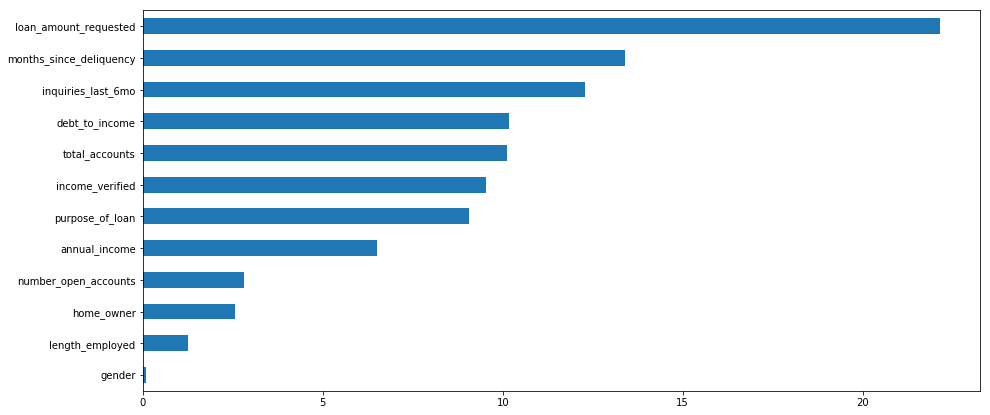

In [20]:
feat_importances = pd.Series(cbc_1.feature_importances_, index=train_df[x_name].columns)
feat_importances.nlargest(30).sort_values(ascending = True).plot(kind='barh',figsize=(15,7))

In [21]:
y_pred_val = cbc_1.predict(x_val)

In [22]:
y_pred_test = cbc_1.predict(x_te)
y_prob_test = cbc_1.predict_proba(x_te)

In [23]:
xtest = test_df.copy()

In [24]:
xtest['y_pred'] =  y_pred_test
xtest = xtest[['loan_id','y_pred']]

In [25]:
sample_df.columns

Index(['loan_id', 'interest_rate'], dtype='object')

In [26]:
xtest =  pd.DataFrame(xtest)
xtest.shape

(109541, 2)

In [27]:
xtest.head()

,loan_id,y_pred
0,10164310,2.00
1,10164311,1.00
2,10164312,3.00
3,10164313,2.00
4,10164314,2.00


In [28]:
sample_df.shape

(109541, 2)

In [29]:
sample_df.head()

,loan_id,interest_rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [30]:
sample=pd.merge(sample_df,xtest,on = 'loan_id' , how ='left')

In [31]:
sample['interest_rate'] =  sample['y_pred']
sample.drop(columns='y_pred',inplace=True)

In [32]:
sample.columns =  ['Loan_ID', 'Interest_Rate']
sample

,Loan_ID,Interest_Rate
0,10164310,2.00
1,10164311,1.00
2,10164312,3.00
3,10164313,2.00
4,10164314,2.00
5,10164315,3.00
6,10164316,3.00
7,10164317,3.00
8,10164318,3.00
9,10164319,3.00


In [33]:
sample.to_csv(f'submission/cb_submit_{t_stamp}.csv',index=False)

In [34]:
for coli in cols_cat:
    print(coli)
    print(train_df.groupby([f'{coli}']).agg({'months_since_deliquency':['min','mean','median','count']}))
    print('-'*100)

loan_amount_requested
                      months_since_deliquency                   
                                          min  mean median count
loan_amount_requested                                           
1,000                                    0.00 34.93  33.00   182
1,025                                   55.00 55.00  55.00     1
1,050                                   67.00 67.00  67.00     1
1,075                                   17.00 43.00  54.00     3
1,100                                   52.00 65.00  65.00     2
1,125                                   16.00 27.67  20.00     3
1,150                                   28.00 28.00  28.00     1
1,200                                    1.00 36.07  35.00   115
1,225                                     nan   nan    nan     0
1,250                                   23.00 23.00  23.00     1
1,275                                   14.00 14.00  14.00     1
1,300                                   11.00 42.56  35.00    16
1,3

In [33]:
train_df['months_since_deliquency'] = train_df.groupby(['months_since_deliquency']).months_since_deliquency.transform(lambda x: x.fillna(x.mean()))

ValueError: Length mismatch: Expected axis has 75930 elements, new values have 164309 elements

In [13]:
re = summarise_yourdf(train_df,10)
gview(re)

Dataset Shape: (164309, 14)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [17]:
id_name = 'loan_id'
y_name = 'interest_rate'
x_name = [coli for coli in train_df.columns if coli not in [f'{y_name}',f'{id_name}']]

In [18]:
cols_cat =  get_catcolnames(train_df)
cols_num =  get_numcolnames(train_df)

In [16]:
corr = train_df[cols_num].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,loan_id,annual_income,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,interest_rate
loan_id,1,0.0083,-0.0013,0.0026,0.0021,0.0046,0.0053,0.0013
annual_income,0.0083,1,-0.17,0.06,-0.058,0.15,0.2,-0.053
debt_to_income,-0.0013,-0.17,1,-0.0051,0.0064,0.3,0.23,0.15
inquiries_last_6mo,0.0026,0.06,-0.0051,1,0.012,0.1,0.13,0.19
months_since_deliquency,0.0021,-0.058,0.0064,0.012,1,-0.05,-0.062,-0.042
number_open_accounts,0.0046,0.15,0.3,0.1,-0.05,1,0.68,0.0028
total_accounts,0.0053,0.2,0.23,0.13,-0.062,0.68,1,-0.041
interest_rate,0.0013,-0.053,0.15,0.19,-0.042,0.0028,-0.041,1


In [20]:
tr =  train_df.dropna()

In [22]:
tr.to_csv('input_data/sampl.csv',index=False)

In [28]:
tr12=tr[((tr['interest_rate']==1) | (tr['interest_rate']==2))]
tr12['interest_rate'].value_counts()

2    23155
1     7923
Name: interest_rate, dtype: int64

In [29]:
tr23=tr[((tr['interest_rate']==2) | (tr['interest_rate']==3))]
tr23['interest_rate'].value_counts()

2    23155
3    20883
Name: interest_rate, dtype: int64

In [30]:
tr13=tr[((tr['interest_rate']==1) | (tr['interest_rate']==3))]
tr13['interest_rate'].value_counts()

3    20883
1     7923
Name: interest_rate, dtype: int64

In [31]:
tr12.to_csv('input_data/sampl12.csv',index=False)
tr23.to_csv('input_data/sampl23.csv',index=False)
tr13.to_csv('input_data/sampl13.csv',index=False)

In [55]:
if False:
    train_df = train_df.dropna()   

In [84]:
train_df['city_development_index'] = train_df['city_development_index'].str.replace('city_','')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

<span style="font-size: 150%;color:blue;font-weight:bold">Data Quality</span> 

> DQ : Train Data set

In [49]:
gview(train_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [41]:
# For Train 
gview(summarise_yourdf(train_df,10))

Dataset Shape: (18359, 14)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

> DQ : Test Data set

In [58]:
gview(test_df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [42]:
# For Train 
gview(summarise_yourdf(test_df,10))

Dataset Shape: (15021, 13)


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<span style="font-size: 150%;color:blue;font-weight:bold">EDA : Train Data set</span> 

In [72]:
cat_cols = get_catcolnames(train_df)
num_cols = get_numcolnames(train_df)
print('CATEGORICAL COLUMNS ARE:',cat_cols)
print('-'*100)
print('NUMERICAL COLUMNS ARE:',num_cols)

CATEGORICAL COLUMNS ARE: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
----------------------------------------------------------------------------------------------------
NUMERICAL COLUMNS ARE: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


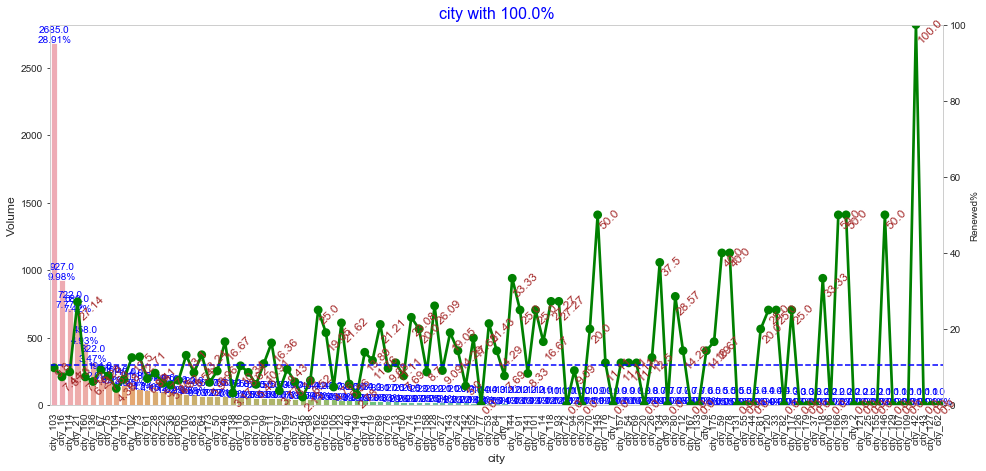

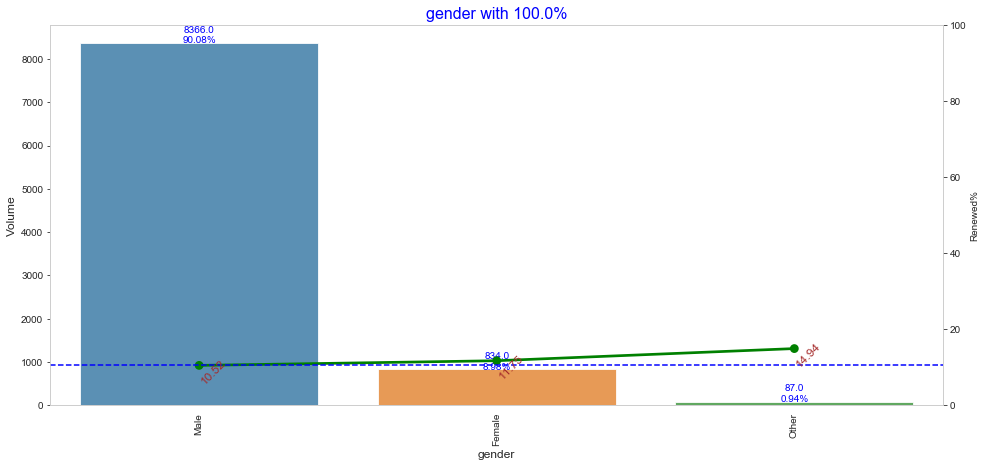

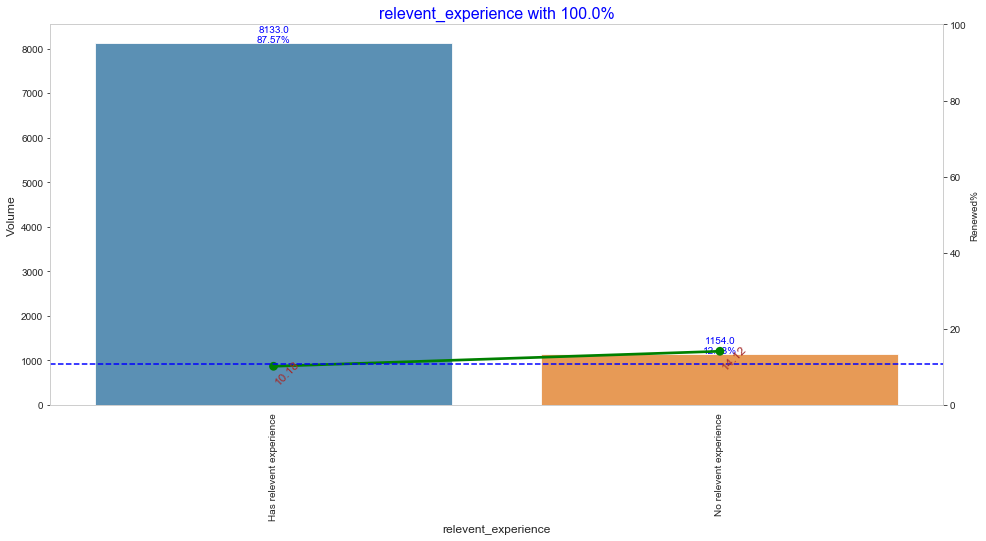

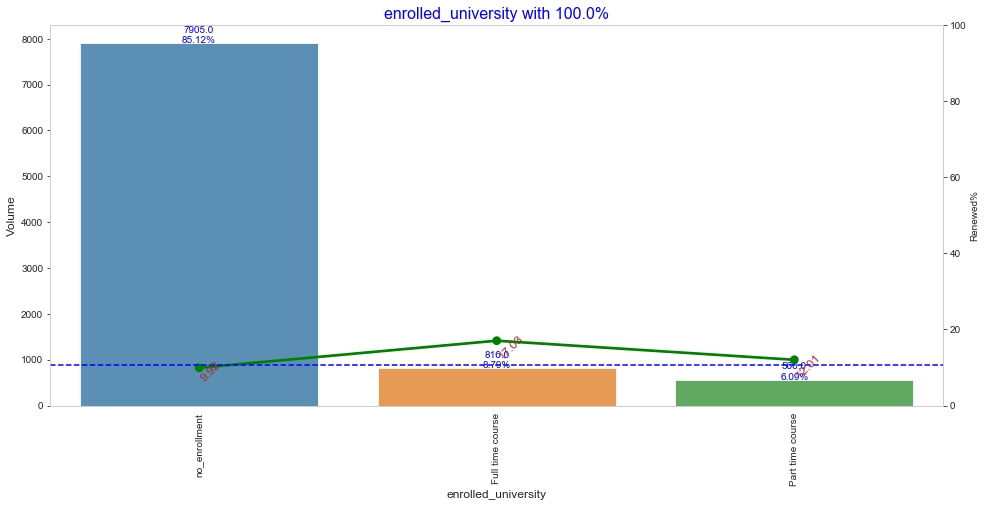

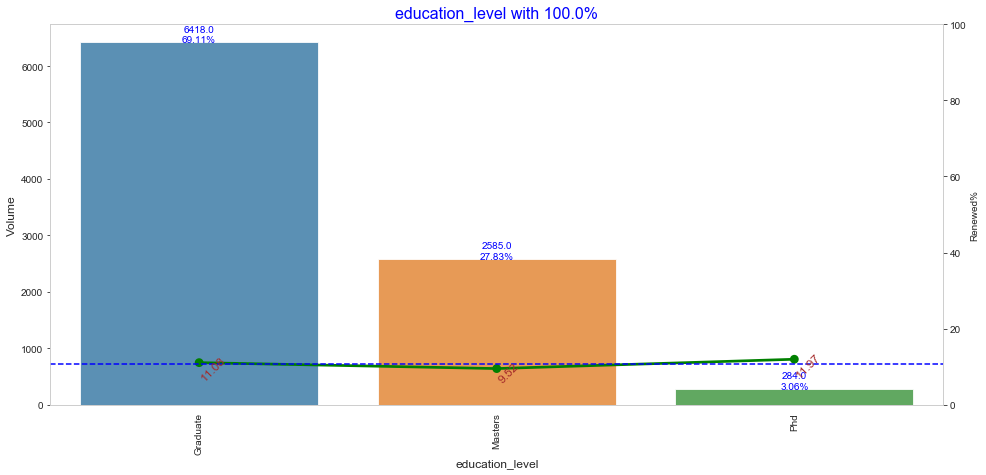

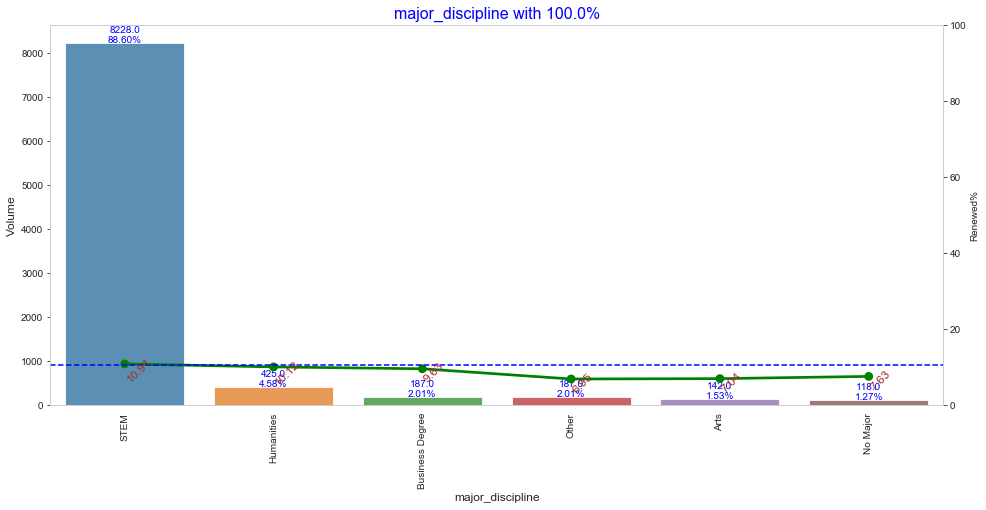

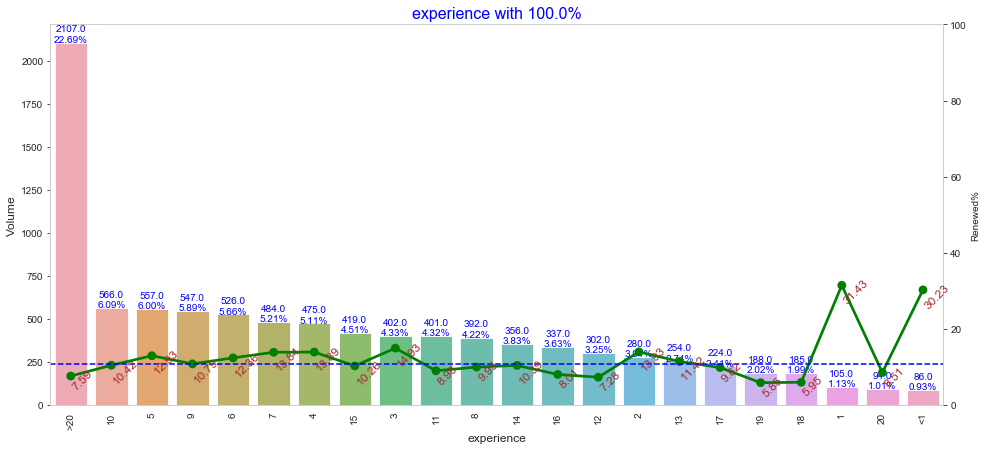

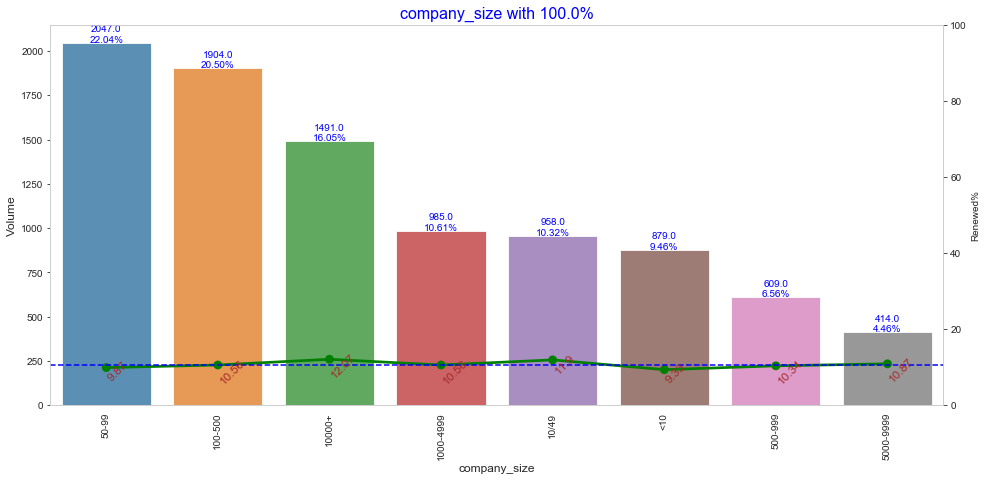

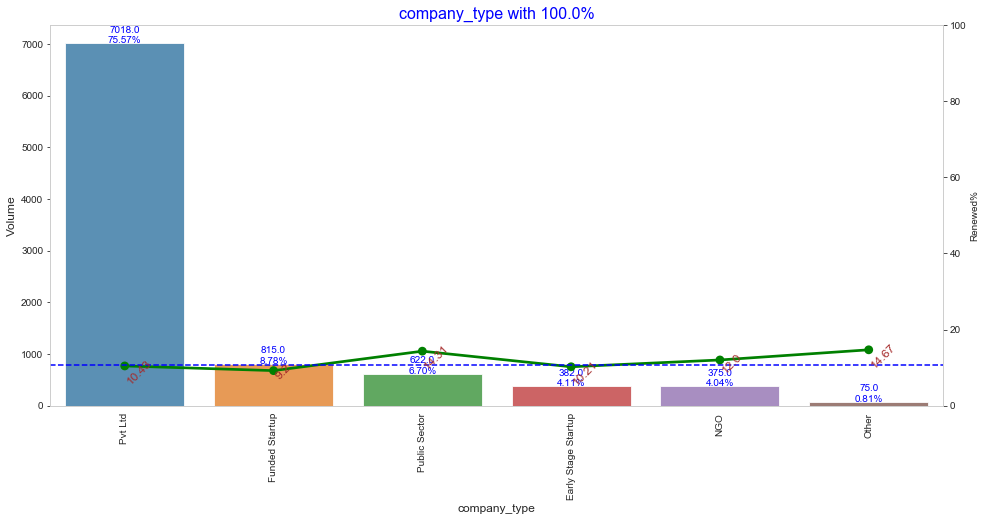

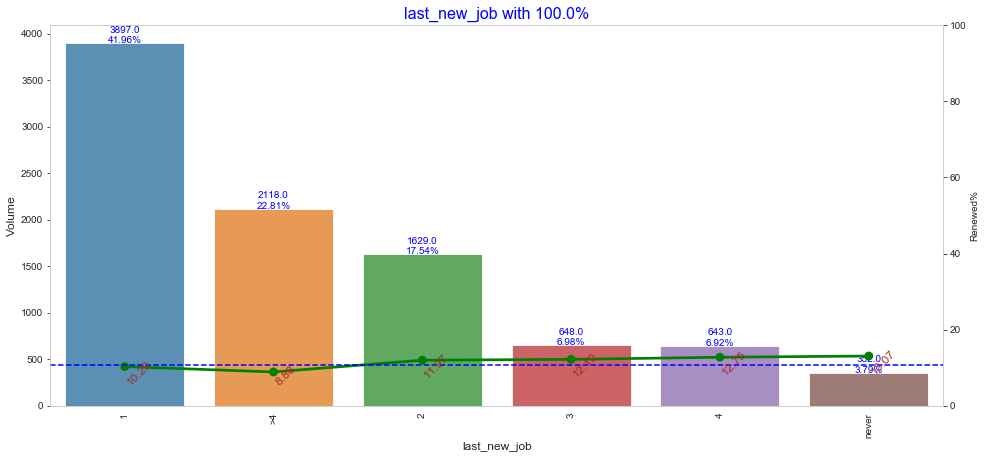

In [79]:
for i in cat_cols:
    
    call_univariate_cat_y2label_indiv(df = train_df,
                                            cat_col=f'{i}',
                                            y_lab='target',
                                            Top_n=160,
                                            thres=np.nan,
                                            ytag=1,
                                            prt='N')

<span style="font-size: 150%;color:blue;font-weight:bold">BASE LINE MODEL</span> 

In [57]:
SEED = 1
import pandas as pd
import numpy as np
import os
import catboost

from catboost import CatBoostClassifier
from catboost import datasets